In [1]:
%matplotlib inline
import sys
from pycocotools.coco import COCO
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import skimage
import skimage.io as io
import copy
from collections import defaultdict

In [2]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [3]:
colors_recykling = {'metals_and_plastics':'yellow',
                    'non-recyclable': 'gray',
                    'unknown':'gray',
                    'glass': 'green',
                    'paper': 'blue',
                    'bio': 'brown',
                    'other': 'pink'}

# deepseawaste pictures
- classes: 52
- annotation: class per image

In [4]:
dataDir = '/dih4/dih4_2/wimlds/data/deepseawaste/images'
excel_path = '/dih4/dih4_2/wimlds/zklawikowska/deepseawaste.xlsx'
df = pd.read_excel(excel_path, engine='openpyxl')  

In [5]:
images = os.listdir(dataDir)
df = df.drop_duplicates(subset=['image'])

In [6]:
def append_value(dict_obj, key, value):
    # Check if key exist in dict or not
    if key in dict_obj:
        # Key exist in dict.
        # Check if type of value of key is list or not
        if not isinstance(dict_obj[key], list):
            # If type is not list then make it list
            dict_obj[key] = [dict_obj[key]]
        # Append the value in list
        dict_obj[key].append(value)
    else:
        # As key is not in dict,
        # so, add key-value pair
        dict_obj[key] = value

In [7]:
categories = df.loc[:,'types']
images_names = df.loc[:,'image']

categories_new = []
image_to_category = {}
category_to_image = {}
i = 0
for cat, name in zip(categories,images_names):

    cat_new = cat.split(', ')    
    i2c = []
    for c in cat_new:

        c = c.split(' (')[0]
        categories_new.append(c)
        i2c.append(c)
        append_value(category_to_image, c, name.split('/')[-1])


    image_to_category[name.split('/')[-1]]=i2c
    
categories = list(set(categories_new))


In [8]:
print(len(image_to_category),len(categories), categories)

544 52 ['Stick-like shape', 'Plastic bottle', 'Packaging/container', 'Glove [rubber/plastic]', 'Beverage can', 'Fishing line', 'Packaging/Container', 'Sandbag/construction bag', 'Piece of plant/wood', 'Bottle', 'Bag', 'Wheel', 'Wire', 'Wooden box', 'Bucket-like shape', 'Basket', 'Windbreaker', 'Box-like shape', 'Beach ball', 'Tube-like shape', 'A kind of component', 'Tarpaulin', 'Plastic bag/sheet', 'Sheet-like shape', 'Plastic bag', 'Ball', 'Bag-like shape', '18-liter square can', 'Belt-like shape', 'Other artificial debris', 'A packaging bag of fishing bait', 'plastic bag/sheet', 'Fishing net', 'Unidentified debris', 'Can', 'Blockish object', 'A pair of pants', 'Ashtray', 'Videotape', 'Beverage bottle', 'Rope', 'Bumper', 'Other plastic product', 'Other cloth product', 'Cord/String-like shape', 'A packaging bag', 'A label for beverage ', 'Boot [rubber/plastic]', 'Cup-like shape', 'Bamboo stick', 'Net', 'Battery']


['A packaging bag'] HPD1826C2HDF1015.jpg
['Unidentified debris', 'Piece of plant/wood'] 2K1278CCDDB1023.jpg
['Beverage can'] HPD0641CCDDB104.jpg
['Unidentified debris', 'Other artificial debris'] HPD1814C2HDF1021.jpg


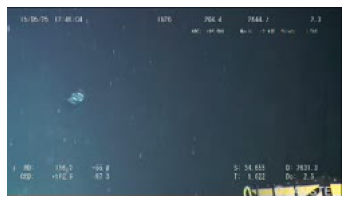

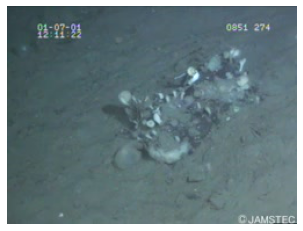

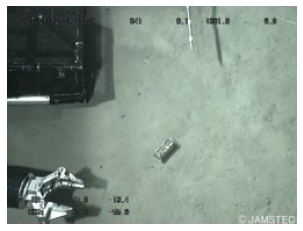

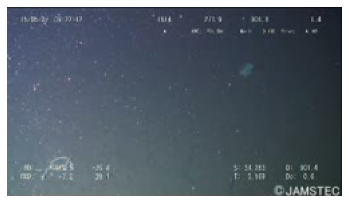

In [9]:
#load and display image
import random
for i in range(1,5):
#     rand_cat = random.choice(categories)
    img_name = random.choice(os.listdir(dataDir))  
    I = io.imread(os.path.join(dataDir,img_name))
    plt.figure()
    plt.imshow(I)
    plt.axis('off')
    print(image_to_category[img_name], img_name)


In [10]:
categories_count = {category: np.size(category_to_image[category]) for category in categories}
categories_count

{'Stick-like shape': 1,
 'Plastic bottle': 3,
 'Packaging/container': 3,
 'Glove [rubber/plastic]': 2,
 'Beverage can': 109,
 'Fishing line': 3,
 'Packaging/Container': 1,
 'Sandbag/construction bag': 1,
 'Piece of plant/wood': 16,
 'Bottle': 6,
 'Bag': 4,
 'Wheel': 1,
 'Wire': 6,
 'Wooden box': 1,
 'Bucket-like shape': 61,
 'Basket': 16,
 'Windbreaker': 2,
 'Box-like shape': 26,
 'Beach ball': 1,
 'Tube-like shape': 1,
 'A kind of component': 3,
 'Tarpaulin': 1,
 'Plastic bag/sheet': 8,
 'Sheet-like shape': 10,
 'Plastic bag': 9,
 'Ball': 2,
 'Bag-like shape': 25,
 '18-liter square can': 27,
 'Belt-like shape': 4,
 'Other artificial debris': 47,
 'A packaging bag of fishing bait': 2,
 'plastic bag/sheet': 1,
 'Fishing net': 4,
 'Unidentified debris': 37,
 'Can': 132,
 'Blockish object': 1,
 'A pair of pants': 3,
 'Ashtray': 1,
 'Videotape': 1,
 'Beverage bottle': 8,
 'Rope': 3,
 'Bumper': 4,
 'Other plastic product': 2,
 'Other cloth product': 2,
 'Cord/String-like shape': 1,
 'A pack

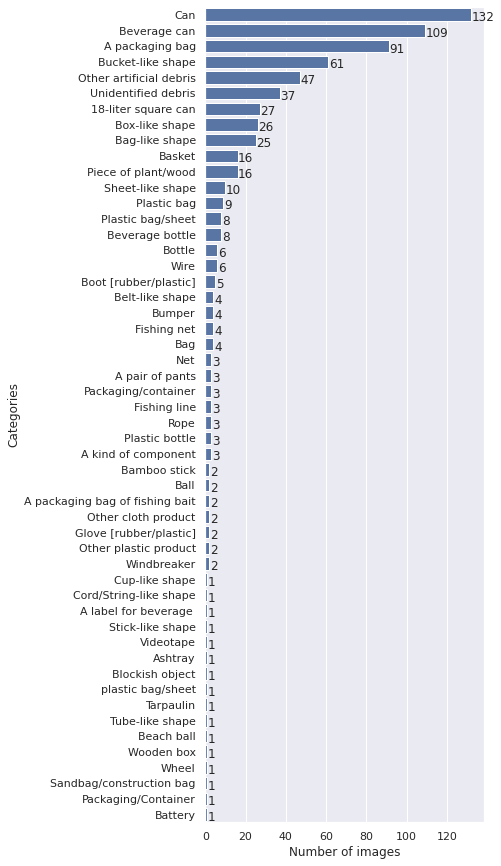

In [11]:
f, ax = plt.subplots(figsize=(5,15))

cat_histogram = np.array([categories_count[category] for category in categories])

# Convert to DataFrame
df = pd.DataFrame({'Categories': categories, 'Number of images': cat_histogram})
df = df.sort_values('Number of images', 0, False)

# Plot the histogram
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of images", y="Categories", data=df,
            label="Total", color="b")
show_values_on_bars(plot_1, "h", 0.3)

In [12]:
def deepseawaste_to_detectwaste(label):


    metals_and_plastics = ['Bottle','Can','Packaging/Container','Plastic bag/sheet','Plastic bag','Packaging/container','A packaging bag','Plastic bottle','Basket','18-liter square can','Other plastic product','Bag','A label for beverage ','Beverage can','plastic bag/sheet','Beverage bottle','A packaging bag of fishing bait']    
    non_recyclable = ['Videotape', 'Beach ball','Boot [rubber/plastic]','Fishing line','A pair of pants', 'Other cloth product', 'Rope','Net','Ball','Glove [rubber/plastic]','Fishing net','Windbreaker', 'Ashtray']    
    other = ['Bumper', 'Piece of plant/wood', 'Tarpaulin', 'Wheel','Battery','Wooden box','Wire','Sandbag/construction bag']

    bio = ['Bamboo stick']
    unknown = ['Blockish object','Box-like shape', 'Stick-like shape', 'Sheet-like shape','Other artificial debris','Belt-like shape','Bucket-like shape','Bag-like shape','Unidentified debris','Tube-like shape','Cup-like shape','Cord/String-like shape','A kind of component']


    if (label in metals_and_plastics):
            label="metals_and_plastics"
    elif(label in non_recyclable):
            label="non-recyclable"
    elif(label in other):
            label="other"

    elif(label in bio):
            label="bio"
    elif(label in unknown):
            label="unknown"
    else:
        print(label, "is non-deepseawaste label")
        label = "unknown"
    return label

In [13]:
detect_waste_count = defaultdict(int)
for category in categories:
    detect_waste_count[deepseawaste_to_detectwaste(category)]+=categories_count[category]
detect_waste_categories = list(detect_waste_count.keys())
detect_waste_count

defaultdict(int,
            {'unknown': 218,
             'metals_and_plastics': 423,
             'non-recyclable': 32,
             'other': 31,
             'bio': 2})

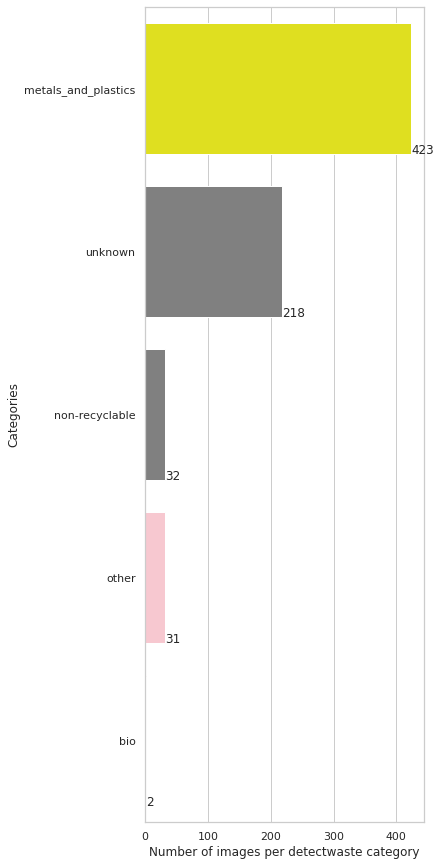

In [14]:

f, ax = plt.subplots(figsize=(5,15))

detect_waste_cat_histogram = np.array([detect_waste_count[category] for category in detect_waste_categories])

# Convert to DataFrame
df = pd.DataFrame({'Categories': detect_waste_categories, 'Number of images per detectwaste category': detect_waste_cat_histogram})
df = df.sort_values('Number of images per detectwaste category', 0, False)

# Plot the histogram
sup_cat = df.loc[:,'Categories'].tolist()
colors = [colors_recykling[cat] for cat in sup_cat]

sns.set(style="whitegrid")
sns.set_palette(sns.color_palette(colors))
plot_1 = sns.barplot(x="Number of images per detectwaste category", y="Categories", data=df,
            label="Total")
show_values_on_bars(plot_1, "h", 0.3)

### Number of images per image shape

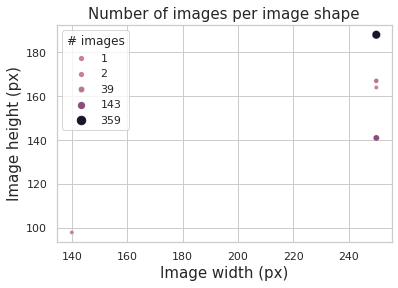

In [15]:
# Parsing image shapes (resolutions)
widths = []
heights = []
shape_freqs = []
img_shapes_keys = {}

for img in images:
    
    try:
        im = plt.imread(dataDir + '/' + img)
        width=np.shape(im)[1]
        height=np.shape(im)[0]

        key = str(width)+'-'+str(height)
        if key in img_shapes_keys:
            shape_id = img_shapes_keys[key]
            shape_freqs[shape_id] += 1
        else:
            img_shapes_keys[key] = len(widths)
            widths.append(width)
            heights.append(height)
            shape_freqs.append(1)
    except:
        pass

d ={'Image width (px)': widths, 'Image height (px)': heights, '# images': shape_freqs}
df = pd.DataFrame(d)
cmap = sns.cubehelix_palette(dark=.1, light=.6, as_cmap=True)
plot = sns.scatterplot(x="Image width (px)", y="Image height (px)", size='# images', hue="# images", palette = cmap,data=df)
plt.xlabel('Image width (px)', fontsize=15)
plt.ylabel('Image height (px)', fontsize=15)
plot = plot.set_title('Number of images per image shape',fontsize=15)